In [1]:
# data load
import pprint as pp
import pandas as pd

# line 727/728 of train is broken, need new line
# valid_df = pd.read_csv('data/valid/data1.csv')
# train_df = pd.read_csv('data/train/data_7000_new.csv', header=None)

# TRAIN_MODE = True
TRAIN_MODE = False
TRAIN_LIMIT = 20
BATCH_SIZE = 25
EPOCHS = 10

def load(path: str) -> list:
    data = []
    with open(path) as reader:
        for i, line in enumerate(reader):
            splits = line.replace('\n', '').split(',')
            data.append(splits)
    return data


valid_df = pd.DataFrame(data=load('data/valid/data1.csv')[1:])
train_df = pd.DataFrame(data=load('data/train/data_7000_new.csv'))

def show_scales():
    for i in range(4, 9):
        pp.pprint(pd.concat([
            train_df[train_df.columns[i]],
            valid_df[valid_df.columns[i]]
        ]))

# show_scales()

funny = {
    'hilarious': 3,
    'very_funny': 2,
    'funny': 1,
    'not_funny': 0
}

sarcasm = {
    'general': 1,
    'not_sarcastic': 0,
    'twisted_meaning': 2,
    'very_twisted': 3
}

offensive = {
    'hateful_offensive': 3,
    'very_offensive': 2,
    'slight': 1,
    'not_offensive': 0,
}

motivation = {
    'motivational': 1,
    'not_motivational': 0}

sentiment = {
    'very_positive': 4,
    'positive': 3,
    'neutral': 2,
    'negative': 1,
    'very_negative': 0}
print("done")

done


In [2]:
import re
sentences2=[sent for sent in train_df[3]]
sent2_val=[sent for sent in valid_df[2]]

cleaned_sent=[]
cleaned_sent_val=[]

for s in sentences2:
    k=re.search(r'\d{1,2}:\d{2} (AM|PM)', s)
    if k is not None:
        ind=k.span()[0]
        new_cleaned_s=s[0:ind]
        cleaned_sent.append(new_cleaned_s)
    else:
        cleaned_sent.append(s)

for s in sent2_val:
    k=re.search(r'\d{1,2}:\d{2} (AM|PM)', s)
    if k is not None:
        ind=k.span()[0]
        new_cleaned_s=s[0:ind]
        cleaned_sent_val.append(new_cleaned_s)
    else:
        cleaned_sent_val.append(s)



In [3]:
labels=[sentiment[label] for label in train_df[8]]
labels_val=[sentiment[label] for label in valid_df[8]]
print(len(labels))
print(len(labels_val))


7000
1000


In [4]:
import preprocessor as p
cleaned_2=[]
cleaned_val=[]
for doc in cleaned_sent:
    p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.RESERVED, p.OPT.NUMBER)
    cleaned_tweet=p.clean(doc)
    cleaned_2.append(cleaned_tweet)
    
for doc in cleaned_sent_val:
    p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.RESERVED, p.OPT.NUMBER)
    cleaned_tweet=p.clean(doc)
    cleaned_val.append(cleaned_tweet)
    
    

In [5]:
import string
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords

stop_words=set(stopwords.words('english'))
words_clean=[]
words_clean_val=[]
for doc in cleaned_2:
    #to remove punctuation using puncutation marks defined in the string library
    doc_clean=doc.translate(str.maketrans('','', string.punctuation))
    #to remove numbers
    doc_clean=doc_clean.translate(str.maketrans('','', '0123456789'))
    #tokenize the reviews using nltk library and make them lowercase
    wordlist=word_tokenize(doc_clean.lower())
    new_word_list=[]
    for word in wordlist:
        if word not in stop_words:
            new_word_list.append(word)
    words_clean.append(new_word_list)
    
for doc in cleaned_val:
    #to remove punctuation using puncutation marks defined in the string library
    doc_clean=doc.translate(str.maketrans('','', string.punctuation))
    #to remove numbers
    doc_clean=doc_clean.translate(str.maketrans('','', '0123456789'))
    #tokenize the reviews using nltk library and make them lowercase
    wordlist=word_tokenize(doc_clean.lower())
    new_word_list=[]
    for word in wordlist:
        if word not in stop_words:
            new_word_list.append(word)
    words_clean_val.append(new_word_list)


In [6]:
import torch
import torch.nn.functional as F
from torch import nn
from torch.autograd import Variable

In [14]:
input_embedding_size=50
hidden_size=50
output_size=5
sequence_length=19
# my_input.view(1, 1, -1)
my_lstm=nn.LSTM(input_embedding_size,hidden_size,sequence_length)
my_dense=nn.Linear(hidden_size,output_size)
# lstm_model=MyLSTM(embedding_size, hidden_size,output_size)
my_lstm.cuda()
my_dense.cuda()

In [7]:
import pickle as p
import os

weights_matrix = p.load(open('27B.50_weightMatrix.pkl', 'rb'))
weight_indcs = p.load(open('27B.50_weight_indexes.pkl', 'rb'))
print("done")

done


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
# import numpy as np

def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

in epoch 0 print 1.5928561823708671
in epoch 1 print 1.5864587324006216
in epoch 2 print 1.5797807438032967
in epoch 3 print 1.5728384256362915
in epoch 4 print 1.564989425454821
in epoch 5 print 1.5566550697599137
in epoch 6 print 1.5469237157276698
in epoch 7 print 1.5335921577044895
in epoch 8 print 1.5100776978901453
in epoch 9 print 1.4620765243257796
in epoch 10 print 1.3944042682647706
in epoch 11 print 1.3441611613546098
in epoch 12 print 1.3193742547716414
in epoch 13 print 1.3075054219790867
in epoch 14 print 1.2947518059185572
in epoch 15 print 1.2907005173819406
in epoch 16 print 1.2876221997397286
in epoch 17 print 1.2811662588800703
in epoch 18 print 1.2788736019815719
in epoch 19 print 1.277638510295323
in epoch 20 print 1.275735170500619
in epoch 21 print 1.275517267840249
in epoch 22 print 1.274257571356637
in epoch 23 print 1.2753913385527476
in epoch 24 print 1.2724837354251317
in epoch 25 print 1.2751365661621095
in epoch 26 print 1.2702319315501622
in epoch 27 prin

<Figure size 432x288 with 0 Axes>

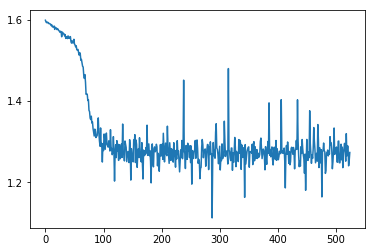

In [11]:
learning_rate=0.00001
optim = torch.optim.Adam(list(my_dense.parameters())+list(my_lstm.parameters()), lr=learning_rate)
criterion = nn.CrossEntropyLoss().cuda()
num_of_epochs=75
batch_size=100
steps=len(words_clean)//batch_size
gold=Variable(torch.FloatTensor(labels)).cuda()
print_every=10
plot_every=10
# lr_decay=50
plot_losses = []
for epoch in range(num_of_epochs):
#     if epoch %lr_decay==0 and epoch>0:
#         learning_rate=learning_rate/10
#         optim = torch.optim.Adam(list(my_dense.parameters())+list(my_lstm.parameters()), lr=learning_rate)
    epoch_loss=0.0
    cnt=0
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every
    epoch_loss=0
    
    shuffled_indcs=torch.randperm(len(words_clean))
    num=0
    for s in range(steps):
        optim.zero_grad()
        input_to_lstm=Variable(torch.zeros(sequence_length,batch_size,input_embedding_size)).cuda()
        gold_batch=Variable(torch.zeros(batch_size).long()).cuda()
        i=0
        
        while i<batch_size:
            if num==len(words_clean):
                num=0
            if len(words_clean[shuffled_indcs[num]])<sequence_length:
                for j in range( len(words_clean[shuffled_indcs[num]])):
                    if words_clean[shuffled_indcs[num].item()][j] in weight_indcs:
                        ind=weight_indcs[words_clean[shuffled_indcs[num].item()][j]]
                        input_to_lstm[j,i,:]=(torch.cuda.FloatTensor(weights_matrix[ind]))
                        
                gold_batch[i]=gold[shuffled_indcs[num]]
                i +=1
            num+=1

        hidden_sequence=my_lstm(input_to_lstm)
        preds=my_dense(hidden_sequence[0][sequence_length-1])
        loss = criterion(preds,gold_batch).cuda()
        print_loss_total += loss.item()
        plot_loss_total += loss.item()
        cnt+=1
        epoch_loss += loss.item()
        
        loss.backward()
        optim.step()
        
        
#         if s % print_every == 0:
#             print_loss_avg = print_loss_total / cnt
#             print_loss_total = 0
#             print("iter:",s,"loss:", print_loss_avg)

        if s % plot_every == 0:
            plot_loss_avg = plot_loss_total / cnt
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0
            cnt=0
    print("in epoch", epoch, "print", epoch_loss/steps)
showPlot(plot_losses)



In [13]:
#validation
l=len(words_clean_val)
gold_val=Variable(torch.FloatTensor(labels_val)).cuda()
input_to_lstm=Variable(torch.zeros(sequence_length,l,input_embedding_size)).cuda()
gold_batch=Variable(torch.zeros(l).long()).cuda()
for i in range(l):
            
    if len(words_clean_val[i])<sequence_length:
        for j in range(len(words_clean_val[i])):
            if words_clean_val[i][j] in weight_indcs:
                ind=weight_indcs[words_clean_val[i][j]]
                input_to_lstm[j,i,:]=(torch.cuda.FloatTensor(weights_matrix[ind]))

        gold_batch[i]=gold_val[i]

hidden_sequence=my_lstm(input_to_lstm)
preds=my_dense(hidden_sequence[0][sequence_length-1])

acc=0
for i in range(l):
#     print("pred:",preds[i].topk(1).indices.item(),"label:", int(gold_val[i].item()))
    
#     print('\n')
    if preds[i].topk(1).indices.item()==int(gold_val[i].item()):
        acc +=1
print("accuracy = ", acc/l)

accuracy =  0.445


# CNN

In [9]:
from IPython import display
from PIL import Image
from torch import nn
from torchvision import models, transforms
from typing import Dict, Tuple, List
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
from tqdm import tqdm

import random
import torch
import numpy as np

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def load_image(filename):
    """
    #https://pytorch.org/hub/pytorch_vision_resnext/
    Simple function to load and preprocess the image.
    1. Open the image.
    2. Scale/crop it and convert it to a float tensor.
    """
    input_image = Image.open(filename).convert('RGB')
    return preprocess(input_image)

load_image('data/train/data_7000/zeck_zuckerberg-memes-fairly-odd-parents-1.jpg')

tensor([[[-1.7925, -0.6623,  1.9064,  ...,  2.2489,  2.2489,  2.2489],
         [-1.4843,  0.8447,  2.2318,  ...,  2.2318,  2.2318,  2.2318],
         [ 0.7419,  2.2318,  2.2318,  ...,  2.2318,  2.2318,  2.2318],
         ...,
         [ 2.1804,  2.1804,  2.1804,  ...,  1.8550,  1.8893,  1.9235],
         [ 2.1804,  2.1804,  2.1804,  ...,  1.9578,  1.9578,  1.9749],
         [ 2.1804,  2.1804,  2.1804,  ...,  2.0092,  2.0263,  2.0263]],

        [[-1.7031, -0.5476,  2.0784,  ...,  2.4286,  2.4286,  2.4286],
         [-1.3880,  0.9930,  2.4111,  ...,  2.4111,  2.4111,  2.4111],
         [ 0.8880,  2.4111,  2.4111,  ...,  2.4111,  2.4111,  2.4111],
         ...,
         [ 2.3585,  2.3585,  2.3585,  ...,  2.0259,  2.0609,  2.0959],
         [ 2.3585,  2.3585,  2.3585,  ...,  2.1310,  2.1310,  2.1485],
         [ 2.3585,  2.3585,  2.3585,  ...,  2.1835,  2.2010,  2.2010]],

        [[-1.4733, -0.3230,  2.2914,  ...,  2.6400,  2.6400,  2.6400],
         [-1.1596,  1.2108,  2.6226,  ...,  2

In [10]:
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
        
    def forward(self, x):
        return x

#classify as positive or negative sentiment
class ImageClassifier(nn.Module):
    def __init__(self, output_dim=5, device=device):
        super(ImageClassifier, self).__init__()
        self.encoder = self.__init_encoder()
        self.linear = nn.Linear(2048, output_dim).to(device)

    def __init_encoder(self): # a helper function for setting up the image encoder
        resnext = models.resnext50_32x4d(pretrained=True).to(device)
        resnext.fc = Identity() #remove last layer
        return resnext
    
    def forward(self, x):
        x = self.linear(self.encoder(x))
        return x
    
net = ImageClassifier(output_dim=5)
if torch.cuda.device_count() > 1:
    print("Let's use", torch.cuda.device_count(), "GPUs!")
    # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
    net = nn.DataParallel(net)

In [18]:
class MemotionDataset(Dataset):
    #X is column of file names, y is 0-4 value for sentiment
    def __init__(self, X: np.ndarray, y: torch.tensor, default_path='data/train/data_7000/'):
        self.X = X
        self.y = y
        self.path = default_path
        
    def __getitem__(self, index):
        try:
            return (load_image(self.path+self.X[index]).to(device), self.y[index].to(device))
        except:
            return self.__getitem__(random.randrange(self.__len__()))

    def __len__(self):
        return self.X.shape[0]

def prep_Xy(in_df):
    X = in_df[0].to_numpy() #col 0 is file name
    y = torch.tensor(in_df[8].transform(lambda y: sentiment[y]).values)
    return X,y

trainset = MemotionDataset(*prep_Xy(train_df))
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, sampler=SubsetRandomSampler(range(TRAIN_LIMIT))) if TRAIN_MODE else \
              DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

validset = MemotionDataset(*prep_Xy(valid_df))
validloader = DataLoader(validset, batch_size=BATCH_SIZE, sampler=SubsetRandomSampler(range(TRAIN_LIMIT))) if TRAIN_MODE else \
              DataLoader(validset, batch_size=BATCH_SIZE, shuffle=True)


In [19]:
import torch.optim as optim

net.train()
criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adagrad(net.parameters())
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
for epoch in range(EPOCHS):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, (X,y) in tqdm(enumerate(trainloader)):
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:    # print every 20 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0
    
    torch.save(net.state_dict(), "a2_cnn_model_state_dict_epoch"+str(i)+".pth")

print('Finished Training')
torch.save(net.state_dict(), 'a2_cnn_model_state_dict_complete.pth')
# torch.save(net, 'a2_cnn_model_full.pth')

20it [00:16,  1.27it/s]

[1,    20] loss: 1.364


34it [00:28,  1.21it/s]/home/ghazal/myenv/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
40it [00:33,  1.21it/s]

[1,    40] loss: 1.366


60it [00:49,  1.25it/s]

[1,    60] loss: 1.281


73it [00:59,  1.25it/s]/home/ghazal/myenv/lib/python3.5/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
80it [01:05,  1.24it/s]

[1,    80] loss: 1.284


100it [01:21,  1.27it/s]

[1,   100] loss: 1.334


120it [01:37,  1.20it/s]

[1,   120] loss: 1.322


140it [01:53,  1.25it/s]

[1,   140] loss: 1.286


160it [02:08,  1.31it/s]

[1,   160] loss: 1.324


180it [02:26,  1.06s/it]

[1,   180] loss: 1.367


200it [02:42,  1.25it/s]

[1,   200] loss: 1.361


220it [02:58,  1.25it/s]

[1,   220] loss: 1.262


240it [03:14,  1.28it/s]

[1,   240] loss: 1.304


260it [03:30,  1.27it/s]

[1,   260] loss: 1.313


280it [03:46,  1.24it/s]
0it [00:00, ?it/s]

[1,   280] loss: 1.301


20it [00:16,  1.17it/s]

[2,    20] loss: 1.181


40it [00:32,  1.24it/s]

[2,    40] loss: 1.174


60it [00:49,  1.20it/s]

[2,    60] loss: 1.186


80it [01:05,  1.23it/s]

[2,    80] loss: 1.148


100it [01:21,  1.18it/s]

[2,   100] loss: 1.110


120it [01:37,  1.25it/s]

[2,   120] loss: 1.181


140it [01:54,  1.03s/it]

[2,   140] loss: 1.209


160it [02:11,  1.21it/s]

[2,   160] loss: 1.205


180it [02:26,  1.28it/s]

[2,   180] loss: 1.213


200it [02:42,  1.25it/s]

[2,   200] loss: 1.227


220it [02:58,  1.21it/s]

[2,   220] loss: 1.167


240it [03:14,  1.25it/s]

[2,   240] loss: 1.215


260it [03:30,  1.27it/s]

[2,   260] loss: 1.237


280it [03:46,  1.24it/s]

[2,   280] loss: 1.206



20it [00:15,  1.33it/s]

[3,    20] loss: 0.913


40it [00:31,  1.30it/s]

[3,    40] loss: 0.912


60it [00:47,  1.28it/s]

[3,    60] loss: 0.832


80it [01:04,  1.11s/it]

[3,    80] loss: 0.849


100it [01:20,  1.30it/s]

[3,   100] loss: 0.859


120it [01:35,  1.31it/s]

[3,   120] loss: 0.817


140it [01:51,  1.23it/s]

[3,   140] loss: 0.821


160it [02:07,  1.27it/s]

[3,   160] loss: 0.874


180it [02:23,  1.29it/s]

[3,   180] loss: 0.839


200it [02:38,  1.31it/s]

[3,   200] loss: 0.856


220it [02:54,  1.23it/s]

[3,   220] loss: 0.874


240it [03:10,  1.28it/s]

[3,   240] loss: 0.985


260it [03:26,  1.31it/s]

[3,   260] loss: 0.970


280it [03:42,  1.26it/s]

[3,   280] loss: 0.957



20it [00:16,  1.28it/s]

[4,    20] loss: 0.494


40it [00:31,  1.28it/s]

[4,    40] loss: 0.444


60it [00:48,  1.19it/s]

[4,    60] loss: 0.465


80it [01:03,  1.29it/s]

[4,    80] loss: 0.431


100it [01:19,  1.30it/s]

[4,   100] loss: 0.366


120it [01:36,  1.21it/s]

[4,   120] loss: 0.407


140it [01:51,  1.28it/s]

[4,   140] loss: 0.437


160it [02:07,  1.26it/s]

[4,   160] loss: 0.404


180it [02:23,  1.25it/s]

[4,   180] loss: 0.448


200it [02:38,  1.30it/s]

[4,   200] loss: 0.476


220it [02:54,  1.30it/s]

[4,   220] loss: 0.476


240it [03:10,  1.30it/s]

[4,   240] loss: 0.511


260it [03:26,  1.27it/s]

[4,   260] loss: 0.536


280it [03:42,  1.26it/s]

[4,   280] loss: 0.537



20it [00:15,  1.26it/s]

[5,    20] loss: 0.333


40it [00:31,  1.29it/s]

[5,    40] loss: 0.279


60it [00:48,  1.13it/s]

[5,    60] loss: 0.234


80it [01:03,  1.30it/s]

[5,    80] loss: 0.235


100it [01:19,  1.29it/s]

[5,   100] loss: 0.263


120it [01:36,  1.28it/s]

[5,   120] loss: 0.247


140it [01:51,  1.33it/s]

[5,   140] loss: 0.283


160it [02:07,  1.33it/s]

[5,   160] loss: 0.270


180it [02:22,  1.33it/s]

[5,   180] loss: 0.252


200it [02:38,  1.28it/s]

[5,   200] loss: 0.237


220it [02:54,  1.26it/s]

[5,   220] loss: 0.266


240it [03:10,  1.23it/s]

[5,   240] loss: 0.281


260it [03:25,  1.30it/s]

[5,   260] loss: 0.316


280it [03:41,  1.26it/s]

[5,   280] loss: 0.278



20it [00:15,  1.24it/s]

[6,    20] loss: 0.163


40it [00:31,  1.28it/s]

[6,    40] loss: 0.184


60it [00:47,  1.18it/s]

[6,    60] loss: 0.166


80it [01:03,  1.19it/s]

[6,    80] loss: 0.179


100it [01:18,  1.28it/s]

[6,   100] loss: 0.246


120it [01:34,  1.31it/s]

[6,   120] loss: 0.173


140it [01:50,  1.13it/s]

[6,   140] loss: 0.148


160it [02:06,  1.26it/s]

[6,   160] loss: 0.195


180it [02:23,  1.17it/s]

[6,   180] loss: 0.182


200it [02:39,  1.31it/s]

[6,   200] loss: 0.134


220it [02:54,  1.31it/s]

[6,   220] loss: 0.191


240it [03:10,  1.24it/s]

[6,   240] loss: 0.150


260it [03:27,  1.23it/s]

[6,   260] loss: 0.136


280it [03:42,  1.26it/s]

[6,   280] loss: 0.193



20it [00:16,  1.23it/s]

[7,    20] loss: 0.089


40it [00:31,  1.28it/s]

[7,    40] loss: 0.116


60it [00:47,  1.30it/s]

[7,    60] loss: 0.090


80it [01:03,  1.30it/s]

[7,    80] loss: 0.084


100it [01:20,  1.32it/s]

[7,   100] loss: 0.154


120it [01:35,  1.30it/s]

[7,   120] loss: 0.141


140it [01:51,  1.25it/s]

[7,   140] loss: 0.134


160it [02:07,  1.31it/s]

[7,   160] loss: 0.118


180it [02:22,  1.31it/s]

[7,   180] loss: 0.128


200it [02:38,  1.25it/s]

[7,   200] loss: 0.149


220it [02:54,  1.27it/s]

[7,   220] loss: 0.157


240it [03:10,  1.24it/s]

[7,   240] loss: 0.140


260it [03:25,  1.27it/s]

[7,   260] loss: 0.168


280it [03:41,  1.26it/s]

[7,   280] loss: 0.129



20it [00:15,  1.25it/s]

[8,    20] loss: 0.120


40it [00:31,  1.22it/s]

[8,    40] loss: 0.087


60it [00:47,  1.29it/s]

[8,    60] loss: 0.119


80it [01:02,  1.30it/s]

[8,    80] loss: 0.077


100it [01:18,  1.26it/s]

[8,   100] loss: 0.077


120it [01:34,  1.25it/s]

[8,   120] loss: 0.064


140it [01:49,  1.32it/s]

[8,   140] loss: 0.074


160it [02:05,  1.34it/s]

[8,   160] loss: 0.096


180it [02:21,  1.26it/s]

[8,   180] loss: 0.094


200it [02:37,  1.20it/s]

[8,   200] loss: 0.093


220it [02:54,  1.33it/s]

[8,   220] loss: 0.078


240it [03:09,  1.23it/s]

[8,   240] loss: 0.103


260it [03:26,  1.27it/s]

[8,   260] loss: 0.088


280it [03:41,  1.26it/s]

[8,   280] loss: 0.113



20it [00:15,  1.30it/s]

[9,    20] loss: 0.074


40it [00:31,  1.23it/s]

[9,    40] loss: 0.085


60it [00:46,  1.32it/s]

[9,    60] loss: 0.062


80it [01:02,  1.24it/s]

[9,    80] loss: 0.083


100it [01:18,  1.26it/s]

[9,   100] loss: 0.055


120it [01:33,  1.27it/s]

[9,   120] loss: 0.072


140it [01:49,  1.28it/s]

[9,   140] loss: 0.084


160it [02:05,  1.23it/s]

[9,   160] loss: 0.096


180it [02:21,  1.25it/s]

[9,   180] loss: 0.060


200it [02:37,  1.29it/s]

[9,   200] loss: 0.067


220it [02:53,  1.23it/s]

[9,   220] loss: 0.110


240it [03:09,  1.31it/s]

[9,   240] loss: 0.078


260it [03:26,  1.00it/s]

[9,   260] loss: 0.086


280it [03:42,  1.26it/s]

[9,   280] loss: 0.108



20it [00:16,  1.23it/s]

[10,    20] loss: 0.046


40it [00:32,  1.23it/s]

[10,    40] loss: 0.045


60it [00:47,  1.22it/s]

[10,    60] loss: 0.058


80it [01:04,  1.24it/s]

[10,    80] loss: 0.059


100it [01:19,  1.29it/s]

[10,   100] loss: 0.075


120it [01:35,  1.25it/s]

[10,   120] loss: 0.063


140it [01:51,  1.26it/s]

[10,   140] loss: 0.093


160it [02:07,  1.25it/s]

[10,   160] loss: 0.081


180it [02:23,  1.29it/s]

[10,   180] loss: 0.072


200it [02:39,  1.29it/s]

[10,   200] loss: 0.049


220it [02:55,  1.28it/s]

[10,   220] loss: 0.049


240it [03:11,  1.30it/s]

[10,   240] loss: 0.078


260it [03:26,  1.25it/s]

[10,   260] loss: 0.100


280it [03:42,  1.26it/s]

[10,   280] loss: 0.064


Finished Training


In [20]:
def eval_accuracy(net, validloader):
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in validloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on %s test images: %d %%' % (
        str(TRAIN_LIMIT) if TRAIN_MODE else 'all',
        100 * correct / total))
    
eval_accuracy(net, validloader)

Accuracy of the network on all test images: 99 %


# Final Part: End to End training using the pretrained modules

# A) Train

In [21]:
torch.save(net, 'model/net.pth')
# torch.save(my_lstm, 'model/lstm.pth')
torch.save(net.state_dict(), 'dict/net.pth')
# torch.save(my_lstm.state_dict(),'dict/lstm.pth')

/home/ghazal/myenv/lib/python3.5/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ImageClassifier. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/ghazal/myenv/lib/python3.5/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ResNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/ghazal/myenv/lib/python3.5/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type BatchNorm2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/ghazal/myenv/lib/python3.5/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't

In [14]:
net=torch.load('model/net.pth')
lstm=torch.load('model/lstm.pth')

iter: 0 loss: 1.8006700277328491
iter: 40 loss: 1.9806707188487054


/home/ghazal/myenv/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


iter: 80 loss: 0.7229006983339786
iter: 120 loss: 0.33192871757782993
iter: 160 loss: 0.24001495736883954
iter: 200 loss: 0.37453461029799656
iter: 240 loss: 0.246150165470317
iter: 280 loss: 0.219397122481314
iter: 320 loss: 0.4632538975449279


/home/ghazal/myenv/lib/python3.5/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


iter: 360 loss: 0.15764233424561097
iter: 400 loss: 0.14035670734592715
iter: 440 loss: 0.12643554208334534
iter: 480 loss: 0.15277675636170898
iter: 520 loss: 0.18269119509495796
iter: 560 loss: 0.14529628882592077
iter: 600 loss: 0.10608253673999571
iter: 640 loss: 0.24364153850001458
iter: 680 loss: 0.21783914755797013
iter: 720 loss: 0.12049060250428738
iter: 760 loss: 0.05889883614145219
iter: 800 loss: 0.1441941726452569
iter: 840 loss: 0.16355709600393312
iter: 880 loss: 0.23879580734937916
iter: 920 loss: 0.18872669018455782
iter: 960 loss: 0.19180397325690138
got_GOT-Meme-9.png
iter: 1000 loss: 0.16156741556478665
iter: 1040 loss: 0.20722958139376715
iter: 1080 loss: 0.1934821947274031
iter: 1120 loss: 0.12767799782086514
iter: 1160 loss: 0.12187892399088014
iter: 1200 loss: 0.11849591797654284
iter: 1240 loss: 0.12038316381222103
iter: 1280 loss: 0.188626820546051
iter: 1320 loss: 0.1170712081300735
iter: 1360 loss: 0.046835655619088354
in epoch 0 print 0.12535788363391864
it

<Figure size 432x288 with 0 Axes>

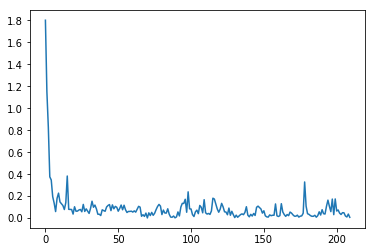

In [18]:
#load cnn: net
image_embed_size=2048
import copy
cnn_net2=copy.deepcopy(net)
cnn_net2.linear=Identity()
cnn_net2.cuda()
my_lstm2=copy.deepcopy(my_lstm).cuda()
# we dont need my_dense anymore and should only use the last sequence ouput of the LSTM ->my_lstm2(last)
final_dense=nn.Linear(hidden_size+image_embed_size,output_size).cuda()



learning_rate=0.00001
optim = torch.optim.Adam(list(cnn_net2.parameters())+list(my_lstm2.parameters())+list(final_dense.parameters()), lr=learning_rate)
criterion = nn.CrossEntropyLoss().cuda()
num_of_epochs=3
batch_size=5
steps=len(words_clean)//batch_size
gold=Variable(torch.FloatTensor(labels)).cuda()
print_every=40
plot_every=20
plot_losses = []


#for loading images
default_path='data/train/data_7000/'
# x_im,y=prep_Xy(train_df)
for epoch in range(num_of_epochs):
    

    epoch_loss=0.0
    cnt=0
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every
    epoch_loss=0
    #add randomness on each epoch
    shuffled_indcs=torch.randperm(len(words_clean))
    num=0
    for s in range(steps):
        optim.zero_grad()
        input_to_lstm=Variable(torch.zeros(sequence_length,batch_size,input_embedding_size)).cuda()
        input_to_cnn=Variable(torch.zeros(batch_size,3,224,224)).cuda()
        gold_batch=Variable(torch.zeros(batch_size).long()).cuda()
        i=0
        while i<batch_size:
            #manually form a batch, i is for counting each data point
            if num==len(words_clean):
                num=0
            if len(words_clean[shuffled_indcs[num].item()])<sequence_length:
                #if sentence is shorter than the number of our LSTM cells, keep loading the batches
                im_path=train_df[0][shuffled_indcs[num].item()] #path to the current image
                try:
                    
                    input_to_cnn[i,:,:,:]=load_image(default_path+im_path)
                except:
                    #in case the image is cirrupted and can't be loaded
                    print(im_path)
                    num=num+1
                    continue
                #now load each word's embedding to form the input of the LSTM
                for j in range( len(words_clean[shuffled_indcs[num].item()])):
                    if words_clean[shuffled_indcs[num].item()][j] in weight_indcs:
                        ind=weight_indcs[words_clean[shuffled_indcs[num].item()][j]]
                        
                        input_to_lstm[j,i,:]=(torch.cuda.FloatTensor(weights_matrix[ind]))
                

                #load labels
                gold_batch[i]=gold[shuffled_indcs[num].item()]
                i +=1
            num+=1
        
        lstm_hidden_sequence=my_lstm2(input_to_lstm)[0].cuda()
        lstm_last_hidden=lstm_hidden_sequence[sequence_length-1]
                              
        cnn_out=cnn_net2(input_to_cnn)
        
        embeds = torch.cat((lstm_last_hidden, cnn_out), dim=1).cuda()
        
        preds=final_dense(embeds)
                              
        loss = criterion(preds,gold_batch).cuda()
        print_loss_total += loss.item()
        plot_loss_total += loss.item()
        cnt+=1
        epoch_loss += loss.item()
        
        loss.backward()
        optim.step()
        
        if s % print_every == 0:
            print_loss_avg = print_loss_total / cnt
            print_loss_total = 0
            print("iter:",s,"loss:", print_loss_avg)

        if s % plot_every == 0:
            plot_loss_avg = plot_loss_total / cnt
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0
            cnt=0
    print("in epoch", epoch, "print", epoch_loss/steps)
showPlot(plot_losses)



# B) Eval

In [19]:
#Evaluate on test set
l=len(words_clean_val)
im_size=(3,224,224)

num=0
# for i in range(l):     
#     if len(words_clean_val[i])<sequence_length:
#         num +=1
num=20
default_path='data/train/data_7000/'
gold_val=Variable(torch.FloatTensor(labels_val)).cuda()
input_to_lstm=Variable(torch.zeros(sequence_length,num,input_embedding_size)).cuda()
input_to_cnn=Variable(torch.zeros(num,*im_size)).cuda()
gold_batch=Variable(torch.zeros(num).long()).cuda()
for i in range(num):     
    if len(words_clean_val[i])<sequence_length:
        for j in range(len(words_clean_val[i])):
            if words_clean_val[i][j] in weight_indcs:
                ind=weight_indcs[words_clean_val[i][j]]
                input_to_lstm[j,i,:]=(torch.cuda.FloatTensor(weights_matrix[ind]))
        im_path=train_df[0][i]
        input_to_cnn[i,:,:,:]=load_image(default_path+im_path)
        gold_batch[i]=gold_val[i]

lstm_hidden_sequence=my_lstm2(input_to_lstm)[0].cuda()
lstm_last_hidden=lstm_hidden_sequence[sequence_length-1]

cnn_out=cnn_net2(input_to_cnn)

embeds = torch.cat((lstm_last_hidden, cnn_out), dim=1).cuda()

preds=final_dense(embeds)
                      
                      
acc=0
for i in range(num):
    if preds[i].topk(1).indices.item()==int(gold_val[i].item()):
        acc +=1
print("accuracy = ", acc/num)

accuracy =  0.45


In [57]:
torch.save(cnn_net2, 'model/last_net.pth')
torch.save(my_lstm2, 'model/last_lstm.pth')
torch.save(cnn_net2.state_dict(), 'dict/last_net.pth')
torch.save(my_lstm2.state_dict(),'dict/last_lstm.pth')

In [11]:
cnn_net2=torch.load('model/last_net.pth')
my_lstm2=torch.load('model/last_lstm.pth')

In [ ]:
net=cnn_net